In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'D:\DataSet\DATASET_UPDATE_TO_ML.csv'
df = pd.read_csv(path)
df.head(5)

,UTC,Date,latitude,longitude,mag,SUN_X,SUN_Y,SUN_Z,199_X,199_Y,...,90000855_Z,Dinkinesh_X,Dinkinesh_Y,Dinkinesh_Z,Gaspra_X,Gaspra_Y,Gaspra_Z,Ceres_X,Ceres_Y,Ceres_Z
0,1/1/2000 1:19,1/1/2000,41.9270,20.543,4.5,-0.00714,-0.002644,-0.000921,-0.147852,-0.400633,...,-0.602941,1.023883,1.519507,0.706154,-1.72029,1.478228,0.478057,-2.384673,0.547941,0.742252
1,1/1/2000 2:10,1/1/2000,41.9150,20.534,2.9,-0.00714,-0.002644,-0.000921,-0.147852,-0.400633,...,-0.602941,1.023883,1.519507,0.706154,-1.72029,1.478228,0.478057,-2.384673,0.547941,0.742252
2,1/1/2000 2:12,1/1/2000,-11.3480,164.568,4.3,-0.00714,-0.002644,-0.000921,-0.147852,-0.400633,...,-0.602941,1.023883,1.519507,0.706154,-1.72029,1.478228,0.478057,-2.384673,0.547941,0.742252
3,1/1/2000 3:20,1/1/2000,48.1190,-2.959,2.7,-0.00714,-0.002644,-0.000921,-0.147852,-0.400633,...,-0.602941,1.023883,1.519507,0.706154,-1.72029,1.478228,0.478057,-2.384673,0.547941,0.742252
4,1/1/2000 3:24,1/1/2000,62.7531,-150.301,2.5,-0.00714,-0.002644,-0.000921,-0.147852,-0.400633,...,-0.602941,1.023883,1.519507,0.706154,-1.72029,1.478228,0.478057,-2.384673,0.547941,0.742252


In [3]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
df['UTC'] = pd.to_datetime(df['UTC']).dt.strftime('%Y-%m-%d %H:%M:%S')
df.head(5)

,UTC,Date,latitude,longitude,mag,SUN_X,SUN_Y,SUN_Z,199_X,199_Y,...,90000855_Z,Dinkinesh_X,Dinkinesh_Y,Dinkinesh_Z,Gaspra_X,Gaspra_Y,Gaspra_Z,Ceres_X,Ceres_Y,Ceres_Z
0,2000-01-01 01:19:00,2000-01-01,41.9270,20.543,4.5,-0.00714,-0.002644,-0.000921,-0.147852,-0.400633,...,-0.602941,1.023883,1.519507,0.706154,-1.72029,1.478228,0.478057,-2.384673,0.547941,0.742252
1,2000-01-01 02:10:00,2000-01-01,41.9150,20.534,2.9,-0.00714,-0.002644,-0.000921,-0.147852,-0.400633,...,-0.602941,1.023883,1.519507,0.706154,-1.72029,1.478228,0.478057,-2.384673,0.547941,0.742252
2,2000-01-01 02:12:00,2000-01-01,-11.3480,164.568,4.3,-0.00714,-0.002644,-0.000921,-0.147852,-0.400633,...,-0.602941,1.023883,1.519507,0.706154,-1.72029,1.478228,0.478057,-2.384673,0.547941,0.742252
3,2000-01-01 03:20:00,2000-01-01,48.1190,-2.959,2.7,-0.00714,-0.002644,-0.000921,-0.147852,-0.400633,...,-0.602941,1.023883,1.519507,0.706154,-1.72029,1.478228,0.478057,-2.384673,0.547941,0.742252
4,2000-01-01 03:24:00,2000-01-01,62.7531,-150.301,2.5,-0.00714,-0.002644,-0.000921,-0.147852,-0.400633,...,-0.602941,1.023883,1.519507,0.706154,-1.72029,1.478228,0.478057,-2.384673,0.547941,0.742252


Japan

Lat : (22.918 ,      40.514)      or      (39.3 ,      49.382)

Lon : (124.277 ,     151.196)     or      (132.451 ,   159.082)

In [4]:
Jp = df[((22.918 <= df['latitude']) & (df['latitude'] <= 40.514) | (39.3 <= df['latitude']) & (df['latitude'] <= 49.382)) &
        ((124.277 <= df['longitude']) & (df['longitude'] <= 151.196) | (132.451 <= df['longitude']) & (df['longitude'] <= 159.082)) &
        (df['Date'] >= '2000-01-01') & (df['mag'] >= 0)]
Jp.head(5)

,UTC,Date,latitude,longitude,mag,SUN_X,SUN_Y,SUN_Z,199_X,199_Y,...,90000855_Z,Dinkinesh_X,Dinkinesh_Y,Dinkinesh_Z,Gaspra_X,Gaspra_Y,Gaspra_Z,Ceres_X,Ceres_Y,Ceres_Z
35,2000-01-01 19:30:00,2000-01-01,23.112,143.644,5.2,-0.007140,-0.002644,-0.000921,-0.147852,-0.400633,...,-0.602941,1.023883,1.519507,0.706154,-1.720290,1.478228,0.478057,-2.384673,0.547941,0.742252
43,2000-01-02 02:02:00,2000-01-02,47.605,154.423,4.2,-0.007134,-0.002651,-0.000924,-0.126483,-0.405565,...,-0.601298,1.012587,1.524985,0.708922,-1.728906,1.472102,0.474910,-2.388252,0.538089,0.738344
101,2000-01-02 23:18:00,2000-01-02,33.692,138.127,4.3,-0.007134,-0.002651,-0.000924,-0.126483,-0.405565,...,-0.601298,1.012587,1.524985,0.708922,-1.728906,1.472102,0.474910,-2.388252,0.538089,0.738344
114,2000-01-03 11:25:00,2000-01-03,32.562,130.778,4.1,-0.007129,-0.002657,-0.000927,-0.104766,-0.409323,...,-0.599653,1.001251,1.530404,0.711663,-1.737482,1.465942,0.471751,-2.391788,0.528228,0.734423
120,2000-01-03 16:34:00,2000-01-03,45.135,148.238,4.1,-0.007129,-0.002657,-0.000927,-0.104766,-0.409323,...,-0.599653,1.001251,1.530404,0.711663,-1.737482,1.465942,0.471751,-2.391788,0.528228,0.734423


In [ ]:
Jp['UTC'] = pd.to_datetime(Jp['UTC'], errors='coerce')
Jp['UTC'] = Jp['UTC'].map(pd.Timestamp.timestamp)
# Jp.head(3)

In [6]:
time = Jp['UTC']/10**9
lat = Jp['latitude']/180
lon = Jp['longitude']/360
mag = Jp['mag']/10
y = pd.concat([lat, lon, mag], axis=1)
y

,latitude,longitude,mag
35,0.128400,0.399011,0.52
43,0.264472,0.428953,0.42
101,0.187178,0.383686,0.43
114,0.180900,0.363272,0.41
120,0.250750,0.411772,0.41
...,...,...,...
627884,0.179198,0.393892,0.46
627891,0.206598,0.380056,0.43
627909,0.242739,0.400772,0.45
627919,0.163568,0.393322,0.48


In [7]:
x = Jp.iloc[:, 5:]
x = pd.concat([time, x], axis=1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train)

             UTC     SUN_X     SUN_Y     SUN_Z     199_X     199_Y     199_Z  \
518274  1.580684 -0.004065  0.006750  0.002960  0.317712  0.104840  0.022004   
297617  1.316201 -0.003647 -0.000733 -0.000310 -0.186559  0.228125  0.140906   
173324  1.164858  0.002524  0.003694  0.001486 -0.355488  0.064411  0.071043   
9575    0.964279 -0.005873 -0.003863 -0.001477  0.346949 -0.120892 -0.100581   
274680  1.286649 -0.004205  0.001129  0.000507 -0.378113  0.026294  0.052717   
...          ...       ...       ...       ...       ...       ...       ...   
284518  1.299947 -0.004096  0.000254  0.000127  0.196399  0.220768  0.097133   
119076  1.110825  0.004314  0.000243 -1.242018 -0.123376  0.251568  0.147479   
198693  1.190718  0.000775  0.004482  0.001855  0.059124 -0.394977 -0.217576   
9419    0.964028 -0.005894 -0.003847 -0.001469  0.323206 -0.190665 -0.135392   
281924  1.297143 -0.004137  0.000432  0.000204  0.063801 -0.396636 -0.218945   

           299_X     299_Y     299_Z  .

In [10]:
print(y_train)

        latitude  longitude   mag
518274  0.264643   0.424719  0.45
297617  0.223739   0.396608  0.67
173324  0.263461   0.431253  0.43
9575    0.190144   0.386669  0.44
274680  0.268233   0.428153  0.45
...          ...        ...   ...
284518  0.210617   0.402089  0.51
119076  0.138078   0.391761  0.38
198693  0.153656   0.353481  0.44
9419    0.189856   0.386469  0.52
281924  0.148267   0.400289  0.48

[25652 rows x 3 columns]


Model 

In [11]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(360, input_dim=x_train.shape[1], activation=tf.keras.activations.relu))
model.add(Dense(180, activation=tf.keras.activations.relu))
model.add(Dense(64, activation=tf.keras.activations.relu))
model.add(Dense(32, activation=tf.keras.activations.relu))
model.add(Dense(3, activation=tf.keras.activations.sigmoid)) # latitude, longitude, magnetude

In [12]:
model.compile(optimizer='adam', loss=tf.keras.losses.mse,metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
642/642 [==============================] - 7s 7ms/step - loss: 0.0015 - accuracy: 0.9046 - val_loss: 0.0012 - val_accuracy: 0.9135
Epoch 2/30
642/642 [==============================] - 4s 7ms/step - loss: 0.0012 - accuracy: 0.9129 - val_loss: 0.0012 - val_accuracy: 0.9135
Epoch 3/30
642/642 [==============================] - 4s 7ms/step - loss: 0.0012 - accuracy: 0.9130 - val_loss: 0.0012 - val_accuracy: 0.9135
Epoch 4/30
642/642 [==============================] - 4s 6ms/step - loss: 0.0012 - accuracy: 0.9130 - val_loss: 0.0012 - val_accuracy: 0.9135
Epoch 5/30
642/642 [==============================] - 4s 6ms/step - loss: 0.0012 - accuracy: 0.9130 - val_loss: 0.0012 - val_accuracy: 0.9135
Epoch 6/30
642/642 [==============================] - 4s 6ms/step - loss: 0.0011 - accuracy: 0.9130 - val_loss: 0.0012 - val_accuracy: 0.9135
Epoch 7/30
642/642 [==============================] - 4s 6ms/step - loss: 0.0012 - accuracy: 0.9130 - val_loss: 0.0012 - val_accuracy: 0.9135
Epoch 

In [ ]:
model.save('Jp_train3_sigmoid.h5')

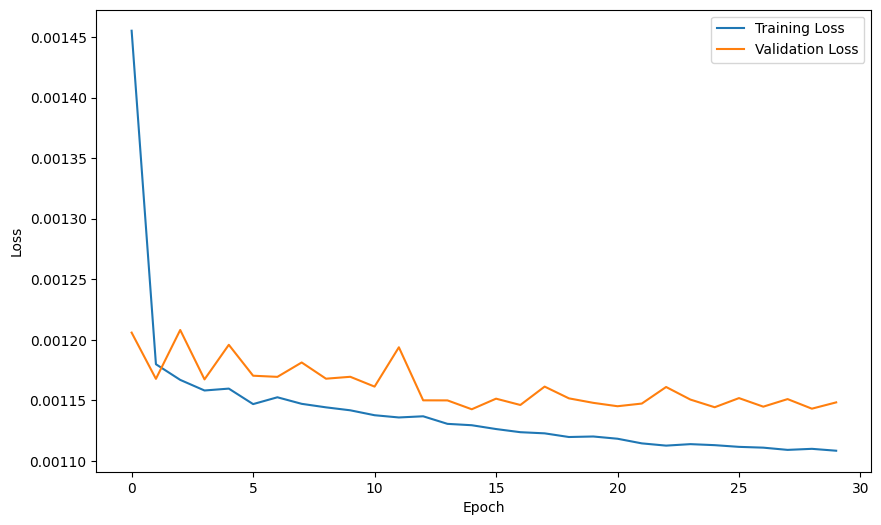

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
print(y_test)

        latitude  longitude   mag
325325  0.214417   0.394911  0.46
496934  0.270699   0.426107  0.48
518084  0.251648   0.412846  0.42
235101  0.162539   0.361931  0.41
621081  0.170571   0.394799  0.42
...          ...        ...   ...
218206  0.200956   0.393819  0.48
36403   0.156272   0.360319  0.44
172739  0.256928   0.428119  0.46
167798  0.258167   0.426422  0.40
159186  0.178500   0.383367  0.46

[10994 rows x 3 columns]


In [ ]:
from keras.models import load_model


model = load_model('D:\Earthquake\Machine Learning Model\JP_train3_sigmoid.h5')
# model = load_model('D:\Earthquake\Machine Learning Model\JP_train.h5')

In [16]:
y_pred = model.predict(x_test)

print(y_pred)

344/344 [==============================] - 1s 2ms/step
[[0.20448992 0.393387   0.46713102]
 [0.19529675 0.39137325 0.4580848 ]
 [0.19841294 0.3924362  0.45630792]
 ...
 [0.26870874 0.42495024 0.45723873]
 [0.22238123 0.39952165 0.4391397 ]
 [0.19850534 0.39049476 0.4307285 ]]


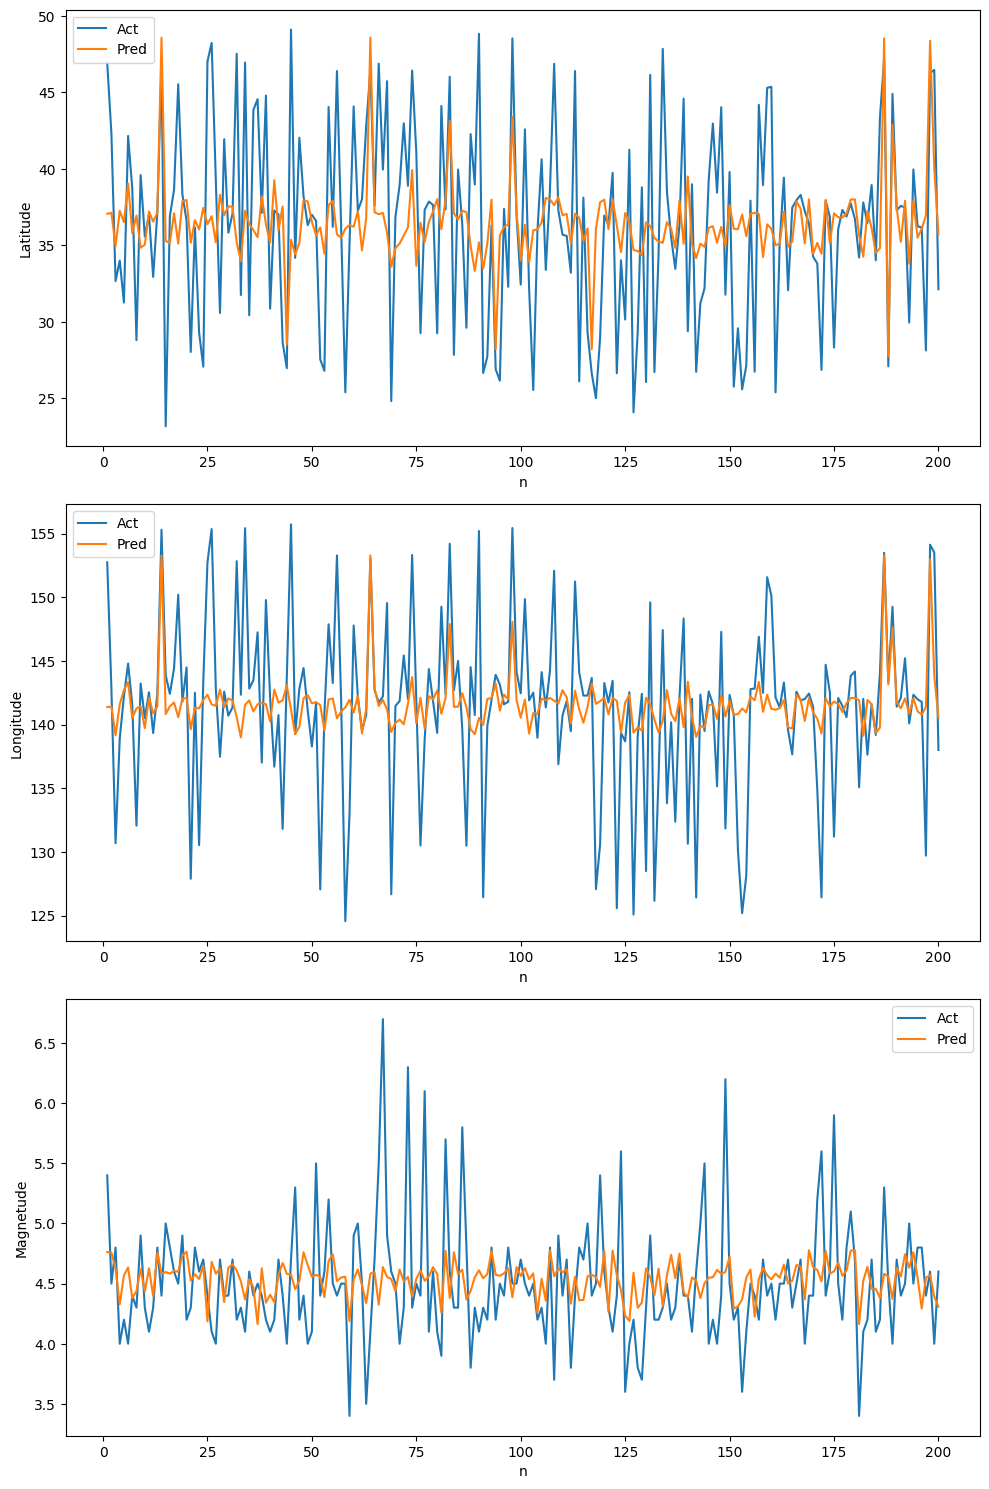

In [20]:
y_test_pl = np.array(y_test)


n_plot = -200

last_120_rows_y_test_pl = y_test_pl[n_plot:, :]
last_120_rows_y_pred = y_pred[n_plot:, :]

n = np.arange(1, len(last_120_rows_y_pred[:, 0])+1)


fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].plot(n, last_120_rows_y_test_pl[:, 0]*180, label='Act')
ax[0].plot(n, last_120_rows_y_pred[:, 0]*180, label='Pred')
ax[0].set_xlabel('n')
ax[0].set_ylabel('Latitude')
ax[0].legend()

ax[1].plot(n, last_120_rows_y_test_pl[:, 1]*360, label='Act')
ax[1].plot(n, last_120_rows_y_pred[:, 1]*360, label='Pred')
ax[1].set_xlabel('n')
ax[1].set_ylabel('Longitude')
ax[1].legend()

ax[2].plot(n, last_120_rows_y_test_pl[:, 2]*10, label='Act')
ax[2].plot(n, last_120_rows_y_pred[:, 2]*10, label='Pred')
ax[2].set_xlabel('n')
ax[2].set_ylabel('Magnetude')
ax[2].legend()

plt.tight_layout()
plt.show()